# Season analysis - Premier League 2017/2018

In this file we will analyze how the different teams in the Premier League performed in the 2017/2018 season. We will compare the teams different stats against each other and conclude what teams did well, and what teams that did less well. From this data we will then chose one team to look more at and analyze what could have been improved for them so achieve more than they did this season. 

## Background
In the 2017/2018 season of the Premier League, the table looked like this:

| Position | Team                  | Played | Wins | Draws | Losses | Goals For | Goals Against | Points |
|----------|-----------------------|--------|------|-------|--------|-----------|---------------|--------|
| 1        | Manchester City       | 38     | 32   | 4     | 2      | 106       | 27            | 100    |
| 2        | Manchester United     | 38     | 25   | 6     | 7      | 68        | 28            | 81     |
| 3        | Tottenham Hotspur     | 38     | 23   | 8     | 7      | 74        | 36            | 77     |
| 4        | Liverpool             | 38     | 21   | 12    | 5      | 84        | 38            | 75     |
| 5        | Chelsea               | 38     | 21   | 7     | 10     | 62        | 38            | 70     |
| 6        | Arsenal               | 38     | 19   | 6     | 13     | 74        | 51            | 63     |
| 7        | Burnley               | 38     | 14   | 12    | 12     | 36        | 39            | 54     |
| 8        | Everton               | 38     | 13   | 10    | 15     | 44        | 58            | 49     |
| 9        | Leicester City        | 38     | 12   | 11    | 15     | 56        | 60            | 47     |
| 10       | Newcastle United      | 38     | 12   | 8     | 18     | 39        | 47            | 44     |
| 11       | Crystal Palace        | 38     | 11   | 11    | 16     | 45        | 55            | 44     |
| 12       | Bournemouth           | 38     | 11   | 11    | 16     | 45        | 61            | 44     |
| 13       | West Ham United       | 38     | 10   | 12    | 16     | 48        | 68            | 42     |
| 14       | Watford               | 38     | 11   | 8     | 19     | 44        | 64            | 41     |
| 15       | Brighton & Hove Albion| 38     | 9    | 13    | 16     | 34        | 54            | 40     |
| 16       | Huddersfield Town     | 38     | 9    | 10    | 19     | 28        | 58            | 37     |
| 17       | Southampton           | 38     | 7    | 15    | 16     | 37        | 56            | 36     |
| 18       | Swansea City          | 38     | 8    | 9     | 21     | 28        | 56            | 33     |
| 19       | Stoke City            | 38     | 7    | 12    | 19     | 35        | 68            | 33     |
| 20       | West Bromwich Albion  | 38     | 6    | 13    | 19     | 31        | 56            | 31     |


Concluded from this results, there are some teams that stands out if different ways. For example, in this season Manchester City managed to score a 100 points, with only losing 2 games out of 38 games. Burnley only managed to score 36 goals through the whole season but still managed to place themselves at 7th in the league.

There is a lot of more data to be found that can tell us why this table came to look like this after the season was concluded. But before we start looking at the details of the teams, let us first look at what teams that had the biggest potential for achieving better results. 

For this to be possible, let us start with an analysis of the season in general. 

## Code 

In [2]:
# Importing libraires
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import pathlib
from bs4 import BeautifulSoup
import requests

In [3]:
# Importing data
# All the data from each match Bournemouth played in the 2017/18 season
# Data is from wyscout/events/events_England.json

path = os.path.join(str(pathlib.Path().resolve().parents[0]), 'src', 'wyscout', "events", 'events_England.json') 
with open(path) as f: 
    data = json.load(f) 
events = pd.DataFrame(data) 

events = events.loc[events.apply (lambda x: len(x.positions) == 2, axis = 1)]

events.head(5)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


In [4]:
# We want to extract the data from all the teams in different dataframes so we can compare them 
# import teams data so we can get their team names
path = os.path.join(str(pathlib.Path().resolve().parents[0]), 'src', 'wyscout', "teams.json")
with open(path) as f: 
    data = json.load(f)
teams = pd.DataFrame(data)

teams.head(5)

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [5]:
# Bournemouth 1
bournemouth_id = 1659
bournemouth_events = events.loc[events['teamId'] == bournemouth_id]
bournemouth_name = teams.loc[teams['wyId'] == bournemouth_id]
bournemouth_name = bournemouth_name['officialName'].to_string(index=False)
bournemouth_events.insert(0, 'teamName', bournemouth_name)

# Arsenal 2
arsenal_id = 1609
arsenal_events = events.loc[events['teamId'] == arsenal_id]
arsenal_name = teams.loc[teams['wyId'] == arsenal_id]
arsenal_name = arsenal_name['officialName'].to_string(index=False)
arsenal_events.insert(0, 'teamName', arsenal_name)

# Brighton & Hove Albion 3
brighton_hove_albion_id = 1651
brighton_hove_albion_events = events.loc[events['teamId'] == brighton_hove_albion_id]
brighton_hove_albion_name = teams.loc[teams['wyId'] == brighton_hove_albion_id]
brighton_hove_albion_name = brighton_hove_albion_name['officialName'].to_string(index=False)
brighton_hove_albion_events.insert(0, 'teamName', brighton_hove_albion_name)

# Burnley 4
burnley_id = 1646
burnley_events = events.loc[events['teamId'] == burnley_id]
burnley_name = teams.loc[teams['wyId'] == burnley_id]
burnley_name = burnley_name['officialName'].to_string(index=False)
burnley_events.insert(0, 'teamName', burnley_name)

# West Brom 5
west_brom_id = 1627
west_brom_events = events.loc[events['teamId'] == west_brom_id]
west_brom_name = teams.loc[teams['wyId'] == west_brom_id]
west_brom_name = west_brom_name['city'].to_string(index=False)
west_brom_events.insert(0, 'teamName', west_brom_name)

# Chelsea 6
chelsea_id = 1610
chelsea_events = events.loc[events['teamId'] == chelsea_id]
chelsea_name = teams.loc[teams['wyId'] == chelsea_id]
chelsea_name = chelsea_name['officialName'].to_string(index=False)
chelsea_events.insert(0, 'teamName', chelsea_name)

# Crystal Palace 7
crystal_palace_id = 1628
crystal_palace_events = events.loc[events['teamId'] == crystal_palace_id]
crystal_palace_name = teams.loc[teams['wyId'] == crystal_palace_id]
crystal_palace_name = crystal_palace_name['officialName'].to_string(index=False)
crystal_palace_events.insert(0, 'teamName', crystal_palace_name)

# Everton 8
everton_id = 1623
everton_events = events.loc[events['teamId'] == everton_id]
everton_name = teams.loc[teams['wyId'] == everton_id]
everton_name = everton_name['officialName'].to_string(index=False)
everton_events.insert(0, 'teamName', everton_name)

# Huddersfield Town 9
huddersfield_town_id = 1673
huddersfield_town_events = events.loc[events['teamId'] == huddersfield_town_id]
huddersfield_town_name = teams.loc[teams['wyId'] == huddersfield_town_id]
huddersfield_town_name = huddersfield_town_name['officialName'].to_string(index=False)
huddersfield_town_events.insert(0, 'teamName', huddersfield_town_name)

# Leicester City 10
leicester_city_id = 1631
leicester_city_events = events.loc[events['teamId'] == leicester_city_id]
leicester_city_name = teams.loc[teams['wyId'] == leicester_city_id]
leicester_city_name = leicester_city_name['officialName'].to_string(index=False)
leicester_city_events.insert(0, 'teamName', leicester_city_name)

# Liverpool 11
liverpool_id = 1612
liverpool_events = events.loc[events['teamId'] == liverpool_id]
liverpool_name = teams.loc[teams['wyId'] == liverpool_id]
liverpool_name = liverpool_name['officialName'].to_string(index=False)
liverpool_events.insert(0, 'teamName', liverpool_name)

# Manchester City 12
manchester_city_id = 1625
manchester_city_events = events.loc[events['teamId'] == manchester_city_id]
manchester_city_name = teams.loc[teams['wyId'] == manchester_city_id]
manchester_city_name = manchester_city_name['officialName'].to_string(index=False)
manchester_city_events.insert(0, 'teamName', manchester_city_name)

# Manchester United 13
manchester_city_events_id = 1611
manchester_united_events = events.loc[events['teamId'] == manchester_city_events_id]
manchester_united_name = teams.loc[teams['wyId'] == manchester_city_events_id]
manchester_united_name = manchester_united_name['officialName'].to_string(index=False)
manchester_united_events.insert(0, 'teamName', manchester_united_name)

# Newcastle United 14
newcastle_united_id = 1613
newcastle_united_events = events.loc[events['teamId'] == newcastle_united_id]
newcastle_united_name = teams.loc[teams['wyId'] == newcastle_united_id]
newcastle_united_name = newcastle_united_name['officialName'].to_string(index=False)
newcastle_united_events.insert(0, 'teamName', newcastle_united_name)

# Southampton 15
southampton_id = 1619
southampton_events = events.loc[events['teamId'] == southampton_id]
southampton_name = teams.loc[teams['wyId'] == southampton_id]
southampton_name = southampton_name['officialName'].to_string(index=False)
southampton_events.insert(0, 'teamName', southampton_name)

# Stoke City 16
stoke_city_id = 1639
stoke_city_events = events.loc[events['teamId'] == stoke_city_id]
stoke_city_name = teams.loc[teams['wyId'] == stoke_city_id]
stoke_city_name = stoke_city_name['officialName'].to_string(index=False)
stoke_city_events.insert(0, 'teamName', stoke_city_name)

# Swansea 17
swansea_id = 10531
swansea_events = events.loc[events['teamId'] == swansea_id]
swansea_name = teams.loc[teams['wyId'] == swansea_id]
swansea_name = swansea_name['city'].to_string(index=False)
swansea_events.insert(0, 'teamName', swansea_name)

# Tottenham 18
tottenham_id = 1624
tottenham_events = events.loc[events['teamId'] == tottenham_id]
tottenham_name = teams.loc[teams['wyId'] == tottenham_id]
tottenham_name = tottenham_name['officialName'].to_string(index=False)
tottenham_events.insert(0, 'teamName', tottenham_name)

# Watford 19
watford_id = 1644
watford_events = events.loc[events['teamId'] == watford_id]
watford_name = teams.loc[teams['wyId'] == watford_id]
watford_name = watford_name['officialName'].to_string(index=False)
watford_events.insert(0, 'teamName', watford_name)

# West Ham United 20
west_ham_united_id = 1633
west_ham_united_events = events.loc[events['teamId'] == west_ham_united_id]
west_ham_united_name = teams.loc[teams['wyId'] == west_ham_united_id]
west_ham_united_name = west_ham_united_name['officialName'].to_string(index=False)
west_ham_united_events.insert(0, 'teamName', west_ham_united_name)

team_names = [bournemouth_name, arsenal_name, brighton_hove_albion_name, burnley_name, west_brom_name, chelsea_name, 
              crystal_palace_name, everton_name, huddersfield_town_name, leicester_city_name, liverpool_name, 
              manchester_city_name, manchester_united_name, newcastle_united_name, southampton_name, stoke_city_name, 
              tottenham_name, watford_name, swansea_name, west_ham_united_name]

team_ids = [bournemouth_id, arsenal_id, brighton_hove_albion_id, burnley_id, west_brom_id, chelsea_id, 
              crystal_palace_id, everton_id, huddersfield_town_id, leicester_city_id, liverpool_id, 
              manchester_city_id, manchester_city_events_id, newcastle_united_id, southampton_id, stoke_city_id, 
              tottenham_id, watford_id, swansea_id, west_ham_united_id]

In [6]:
# import match data so we can get stats from the teams performance
path = os.path.join(str(pathlib.Path().resolve().parents[0]), 'src', 'wyscout', "matches", 'matches_England.json')
with open(path) as f: 
    data = json.load(f)
matches = pd.DataFrame(data)

matches.head(5)

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364


In [7]:
# We can now check the amount of matches each team won, lost and drew, how many goals they scored and conceded

# Create a dataframe for the stats
# Let the team_ids be the index for the dataframe
# Create a column for each stat
# Set all the values to 0
# We will then update the values with the stats from the matches dataframe
stats = pd.DataFrame(index=team_ids, columns=['team','games_played', 'wins', 'draws', 'losses', 'goals_for', 'goals_against', 'goal_difference', 'points'])

teams = [str(i) for i in team_names]
stats['team'] = teams

stats = stats.fillna(0)

# Loop through each match
# Check if the team is the home team or away team
# Update the stats accordingly
# We need to check the teamid corresponds to what name and place the stats in the correct row

for index, row in matches.iterrows():

    # Get the home and away team id
    home_team = row['teamsData'][str(list(row['teamsData'].keys())[0])]['teamId']
    away_team = row['teamsData'][str(list(row['teamsData'].keys())[1])]['teamId']

    # Get the score for the home and away team
    home_score = row['teamsData'][str(list(row['teamsData'].keys())[0])]['score']
    away_score = row['teamsData'][str(list(row['teamsData'].keys())[1])]['score']
    
    # Home team wins
    if home_score > away_score:
        stats.at[home_team, 'wins'] += 1
        stats.at[away_team, 'losses'] += 1
        stats.at[home_team, 'points'] += 3

    # Away team wins
    elif home_score < away_score:
        stats.at[home_team, 'losses'] += 1
        stats.at[away_team, 'wins'] += 1
        stats.at[away_team, 'points'] += 3
    
    # Draw
    else:
        stats.at[home_team, 'draws'] += 1
        stats.at[away_team, 'draws'] += 1
        stats.at[home_team, 'points'] += 1
        stats.at[away_team, 'points'] += 1

    # Update goals scored, conceded and games played
    stats.at[home_team, 'goals_for'] += home_score
    stats.at[home_team, 'goals_against'] += away_score
    stats.at[away_team, 'goals_for'] += away_score
    stats.at[away_team, 'goals_against'] += home_score
    stats.at[home_team, 'games_played'] += 1
    stats.at[away_team, 'games_played'] += 1

# Goal difference = goals scored - goals conceded
stats['goal_difference'] = stats['goals_for'] - stats['goals_against']

# Sort stats by points
stats = stats.sort_values(by=['points'], ascending=False)
stats

,team,games_played,wins,draws,losses,goals_for,goals_against,goal_difference,points
1625,Manchester City FC,38,32,4,2,106,27,79,100
1611,Manchester United FC,38,25,6,7,68,28,40,81
1624,Tottenham Hotspur FC,38,23,8,7,74,36,38,77
1612,Liverpool FC,38,21,12,5,84,38,46,75
1610,Chelsea FC,38,21,7,10,62,38,24,70
1609,Arsenal FC,38,19,6,13,74,51,23,63
1646,Burnley FC,38,14,12,12,36,39,-3,54
1623,Everton FC,38,13,10,15,44,58,-14,49
1631,Leicester City FC,38,12,11,15,56,60,-4,47
1613,Newcastle United FC,38,12,8,18,39,47,-8,44


In [8]:
# After getting all the stats from the matches dataframe we can now plot them and draw conclusions

# First import colors for each team
team_colors = {
    'Manchester City FC': '#6CABDD',
    'Manchester United FC': '#DA291C',
    'Tottenham Hotspur FC': '#132257',
    'Liverpool FC': '#C8102E',
    'Chelsea FC': '#034694',
    'Arsenal FC': '#EF0107',
    'Burnley FC': '#6C1D45',
    'Everton FC': '#003399',
    'Leicester City FC': '#003090',
    'Newcastle United FC': '#241F20',
    'AFC Bournemouth': '#DA291C',
    'Crystal Palace FC': '#1B458F',
    'West Ham United FC': '#7A263A',
    'Watford FC': '#FBEE23',
    'Brighton & Hove Albion FC': '#0057B8',
    'Huddersfield Town FC': '#0E63AD',
    'Southampton FC': '#D71920',
    'Stoke City FC': '#E03A3E',
    'Swansea': '#000000',
    'West Bromwich': '#122F67'
}

colors = {
    'Color 1': '#FF0000',    # Red
    'Color 2': '#FF7F00',    # Orange
    'Color 3': '#FFFF00',    # Yellow
    'Color 4': '#00FF00',    # Green
    'Color 5': '#0000FF',    # Blue
    'Color 6': '#4B0082',    # Indigo
    'Color 7': '#8A2BE2',    # Violet
    'Color 8': '#FF1493',    # Deep Pink
    'Color 9': '#FF4500',    # Orange Red
    'Color 10': '#FFD700',   # Gold
    'Color 11': '#008000',   # Green
    'Color 12': '#1E90FF',   # Dodger Blue
    'Color 13': '#8B4513',   # Saddle Brown
    'Color 14': '#9400D3',   # Dark Violet
    'Color 15': '#FF69B4',   # Hot Pink
    'Color 16': '#FF8C00',   # Dark Orange
    'Color 17': '#ADFF2F',   # Green Yellow
    'Color 18': '#32CD32',   # Lime Green
    'Color 19': '#800080',   # Purple
    'Color 20': '#9370DB'    # Medium Purple
}


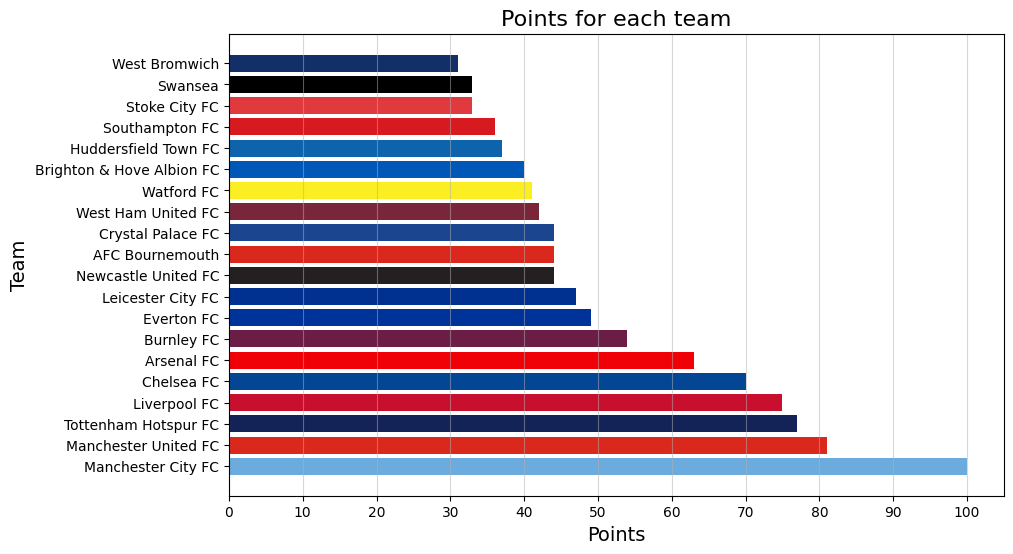

In [9]:
# Plot the points for each team
plt.figure(figsize=(10,6))
plt.barh(stats['team'], stats['points'], color=[team_colors[i] for i in stats['team']])
plt.xticks(range(0, max(stats['points']) + 1, 10))
plt.xlabel('Points', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.title('Points for each team', fontsize=16)
plt.grid(axis='x', alpha=0.5)
plt.show()

In [10]:
# While this plot tells us about the teams points at the end of the season, it doesn't tell us how they got there
# We need to plot the points after each game week to see how the teams performed throughout the season

# Create a dataframe for the points after each game week
# Let the team_ids be the index for the dataframe
# Create a column for each game week
# Set all the values to 0
# We will then update the values with the stats from the matches dataframe

points = pd.DataFrame(index=team_ids, columns=range(1,39))
points.insert(0, 'team', teams)
points = points.fillna(0)

# Loop through each match
# Check which game week it is
# Check if the team is the home team or away team
# Update the stats accordingly
# We need to check the teamid corresponds to what name and place the stats in the correct row
# It is important that we add the points up after each week so we can see how the teams performed throughout the season

for index, row in matches.iterrows():
    for game_week in range(1,39):
        if row['gameweek'] == game_week:
            # Get the home and away team id
            home_team = row['teamsData'][str(list(row['teamsData'].keys())[0])]['teamId']
            away_team = row['teamsData'][str(list(row['teamsData'].keys())[1])]['teamId']

            # Get the score for the home and away team
            home_score = row['teamsData'][str(list(row['teamsData'].keys())[0])]['score']
            away_score = row['teamsData'][str(list(row['teamsData'].keys())[1])]['score']

            # Home team wins
            if home_score > away_score:
                points.at[home_team, game_week] += 3

            # Away team wins
            elif home_score < away_score:
                points.at[away_team, game_week] += 3

            # Draw
            else:
                points.at[home_team, game_week] += 1
                points.at[away_team, game_week] += 1

# The column 2 should be column1 + column2 and column 3 should be column2 + column3 and so on...
for game_week in range(2,39):
    points[game_week] = points[game_week] + points[game_week - 1]

# Sort the dataframe by the last column
points = points.sort_values(by=[38], ascending=False)

points

,team,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
1625,Manchester City FC,3,4,7,10,13,16,19,22,25,...,78,81,84,87,87,90,93,96,97,100
1611,Manchester United FC,3,6,9,10,13,16,19,20,20,...,62,65,66,69,72,72,75,78,78,81
1624,Tottenham Hotspur FC,3,3,4,7,8,11,14,17,20,...,58,61,64,67,70,70,71,74,74,77
1612,Liverpool FC,1,4,7,7,8,11,12,13,13,...,60,60,63,66,67,70,71,72,72,75
1610,Chelsea FC,0,3,6,9,10,13,13,13,16,...,53,56,59,59,60,63,64,67,70,70
1609,Arsenal FC,3,3,3,6,7,10,13,13,16,...,45,48,48,51,54,54,57,57,60,63
1646,Burnley FC,3,3,4,7,8,9,12,13,13,...,40,43,43,46,49,52,53,54,54,54
1623,Everton FC,3,4,4,4,4,7,7,8,8,...,34,37,40,40,41,42,45,48,49,49
1631,Leicester City FC,0,3,3,3,4,4,5,6,9,...,37,40,43,46,46,46,47,47,47,47
1613,Newcastle United FC,0,0,3,6,9,9,10,11,14,...,29,32,32,35,38,41,41,41,41,44


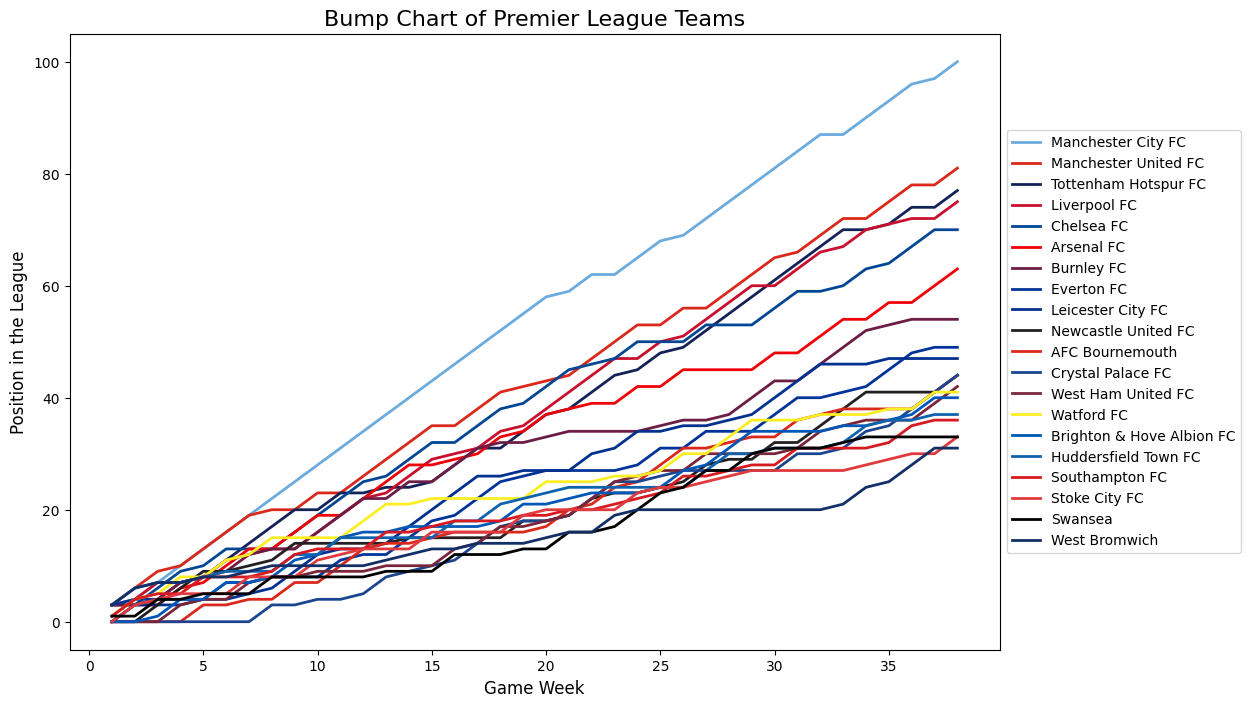

In [11]:
# From this data we can now create a bump chart to see how the teams performed throughout the season

#TODO Need to make the chart better, more clear

# Create a bump chart
plt.figure(figsize=(12, 8))

for index, row in points.iterrows():
    plt.plot(range(1, 39), row[1:], label=row['team'], color = team_colors[row['team']], linewidth=2.0)

plt.xlabel('Game Week', fontsize=12)
plt.ylabel('Position in the League', fontsize=12)
plt.title('Bump Chart of Premier League Teams', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust legend position

plt.show()

In [12]:
# Take the points data frame and for each game week column
# Instead of having the points for each team, we want to have the position of each team
# For example, the team with the most points will be in position 1, the team with the second most points will be in position 2 and so on...

# Rank the values in each row of the points dataframe, excluding the team column
ranked_points = points.iloc[:, 1:].rank(axis=0, method='min', ascending=False)

# Add the team column back to the dataframe
ranked_points.insert(0, 'team', points['team'])

# Sort the dataframe by the last column
ranked_points = ranked_points.sort_values(by=[38])

ranked_points

,team,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
1625,Manchester City FC,1.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1611,Manchester United FC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1624,Tottenham Hotspur FC,1.0,9.0,9.0,5.0,5.0,4.0,3.0,3.0,2.0,...,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1612,Liverpool FC,9.0,4.0,2.0,5.0,5.0,4.0,6.0,5.0,8.0,...,3.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0
1610,Chelsea FC,13.0,9.0,6.0,3.0,3.0,3.0,4.0,5.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1609,Arsenal FC,1.0,9.0,14.0,10.0,12.0,7.0,4.0,5.0,4.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
1646,Burnley FC,1.0,9.0,9.0,5.0,5.0,8.0,6.0,5.0,8.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
1623,Everton FC,1.0,4.0,9.0,14.0,15.0,13.0,14.0,13.0,15.0,...,10.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,8.0,8.0
1631,Leicester City FC,13.0,9.0,14.0,17.0,15.0,17.0,17.0,18.0,14.0,...,8.0,8.0,7.0,7.0,8.0,8.0,8.0,9.0,9.0,9.0
1628,Crystal Palace FC,13.0,16.0,18.0,19.0,20.0,20.0,20.0,20.0,20.0,...,18.0,18.0,18.0,18.0,17.0,16.0,16.0,11.0,10.0,10.0


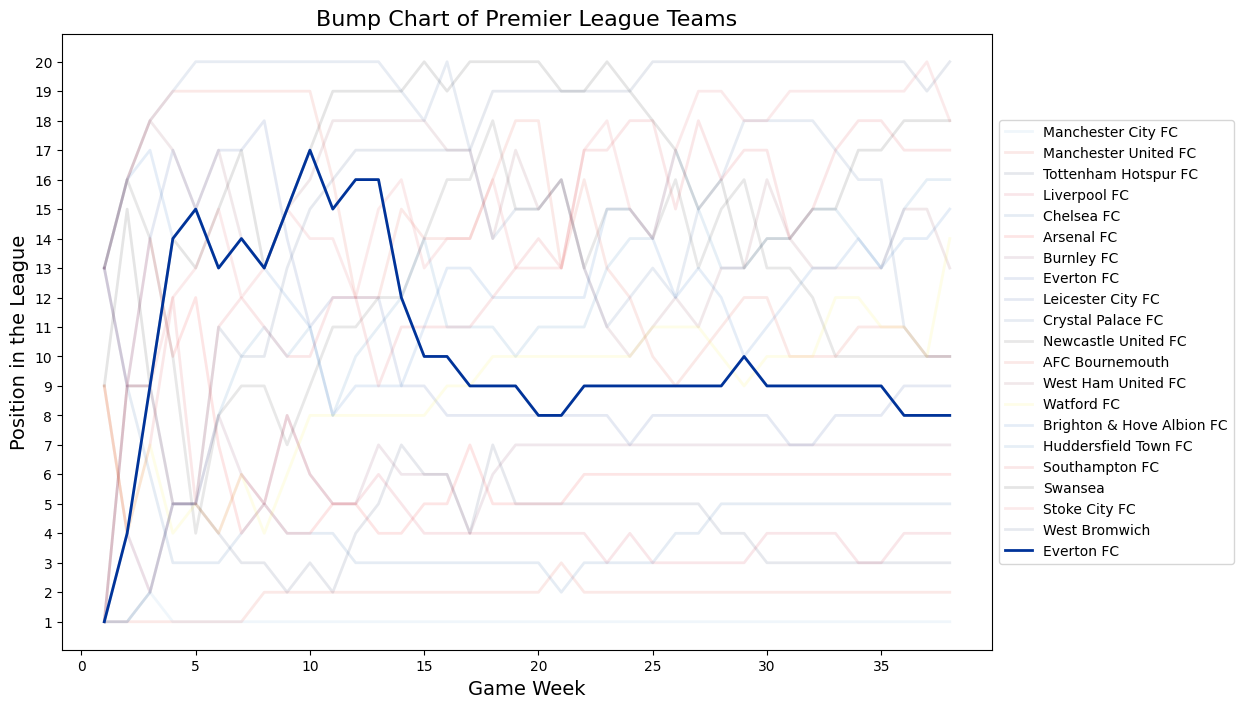

In [22]:
#TODO Need to make the chart better, more clear

# Create a bump chart
plt.figure(figsize=(12, 8))

for index, row in ranked_points.iterrows():
    color_index = index % 20  # Cyclically assign colors
    team_color = f'Color {color_index + 1}'
    plt.plot(range(1, 39), row[1:], label=row['team'], color = team_colors[row['team']], linewidth=2.0, alpha=0.1)

#only plot for manchester united
plt.plot(range(1, 39), ranked_points.loc[ranked_points['team'] == 'Everton FC'].iloc[:, 1:].values[0], label='Everton FC', color = team_colors['Everton FC'], linewidth=2.0)

plt.xlabel('Game Week', fontsize=14)
plt.ylabel('Position in the League', fontsize=14)
plt.yticks(range(1, 21))
plt.title('Bump Chart of Premier League Teams', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust legend position

plt.show()

In [14]:
# Looking at this chart, we can see that there are some teams that went on and had a pretty straight forward season, like Man City
# Other teams, hade more inconsistent seasons, like Everton
# There could be many reasons for this, since every team has different resources to play with and different challanges to overcome

# Lets look at the economic aspect of each team, and see how much money they spent on players and how that correlates to their performance
# We will more specifically look at how much one point costs for each team (in pounds £)

# We will get the economic data from the transfermarkt website

url = "https://www.transfermarkt.com/premier-league/transfers/wettbewerb/GB1/plus/?saison_id=2017&s_w=&leihe=1&intern=0&intern=1"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    print("Success")
else:
    print("Failure")

#TODO: Fix web scraping, now inserting manually

Failure


In [15]:
# Manually

financial = pd.DataFrame(index=team_ids, columns=['team', 'expenditure', 'income', 'transfer record', 'points'])
financial['team'] = stats['team']
financial['points'] = stats['points']

# Insert the data manually for expenditure and income, tranfer record is calculated from the other two columns (income - expenditure)

# AFC Bournemouth
financial.at[1659, 'expenditure'] = 34.30
financial.at[1659, 'income'] = 0.00

# Arsenal
financial.at[1609, 'expenditure'] = 152.85
financial.at[1609, 'income'] = 162.00

# Brighton & Hove Albion
financial.at[1651, 'expenditure'] = 66.50
financial.at[1651, 'income'] = 0.40

# Burnley
financial.at[1646, 'expenditure'] = 35.74
financial.at[1646, 'income'] = 50.00

# Chelsea
financial.at[1610, 'expenditure'] = 260.50
financial.at[1610, 'income'] = 194.60

# Crystal Palace
financial.at[1628, 'expenditure'] = 55.95
financial.at[1628, 'income'] = 3.00

# Everton
financial.at[1623, 'expenditure'] = 203.20
financial.at[1623, 'income'] = 126.38

# Huddersfield Town
financial.at[1673, 'expenditure'] = 56.75
financial.at[1673, 'income'] = 6.46

# Leicester City
financial.at[1631, 'expenditure'] = 83.85
financial.at[1631, 'income'] = 50.10

# Liverpool
financial.at[1612, 'expenditure'] = 173.65
financial.at[1612, 'income'] = 184.50

# Manchester City
financial.at[1625, 'expenditure'] = 317.50
financial.at[1625, 'income'] = 91.35

# Manchester United
financial.at[1611, 'expenditure'] = 198.40
financial.at[1611, 'income'] = 45.50

# Newcastle United
financial.at[1613, 'expenditure'] = 46.50
financial.at[1613, 'income'] = 21.22

# Southampton
financial.at[1619, 'expenditure'] = 61.25
financial.at[1619, 'income'] = 98.35

# Stoke City
financial.at[1639, 'expenditure'] = 57.70
financial.at[1639, 'income'] = 35.14

# Swansea
financial.at[10531, 'expenditure'] = 73.39
financial.at[10531, 'income'] = 81.10

# Tottenham
financial.at[1624, 'expenditure'] = 121.00
financial.at[1624, 'income'] = 103.80

# Watford
financial.at[1644, 'expenditure'] = 73.40
financial.at[1644, 'income'] = 18.74

# West Ham United
financial.at[1633, 'expenditure'] = 56.80
financial.at[1633, 'income'] = 69.02

# West Bromwich
financial.at[1627, 'expenditure'] = 53.50
financial.at[1627, 'income'] = 2.05

# Calculate the transfer record
financial['transfer record'] = financial['income'] - financial['expenditure']

financial = financial.sort_values(by=['transfer record'], ascending=True)

financial['expenditure'] = pd.to_numeric(financial['expenditure'], errors='coerce').dropna()
financial['points'] = pd.to_numeric(financial['points'], errors='coerce').dropna()
financial['transfer record'] = pd.to_numeric(financial['transfer record'], errors='coerce').dropna()

financial

,team,expenditure,income,transfer record,points
1625,Manchester City FC,317.50,91.35,-226.15,100
1611,Manchester United FC,198.40,45.5,-152.90,81
1623,Everton FC,203.20,126.38,-76.82,49
1651,Brighton & Hove Albion FC,66.50,0.4,-66.10,40
1610,Chelsea FC,260.50,194.6,-65.90,70
1644,Watford FC,73.40,18.74,-54.66,41
1628,Crystal Palace FC,55.95,3.0,-52.95,44
1627,West Bromwich,53.50,2.05,-51.45,31
1673,Huddersfield Town FC,56.75,6.46,-50.29,37
1659,AFC Bournemouth,34.30,0.0,-34.30,44


/var/folders/lb/pwyb2dqx58gb1jd7f7zd3_rm0000gn/T/ipykernel_8251/115461850.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(financial['expenditure'], p(financial['expenditure']), "r--", color='black', linewidth=1.0, alpha=0.4)


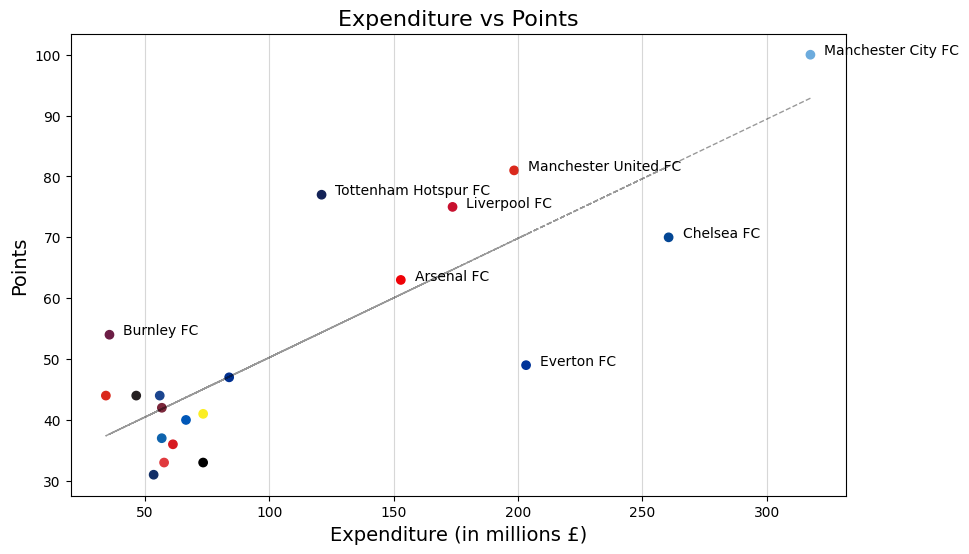

In [16]:
# Lets plot this 
# Scatter plot of expenditure vs points

import numpy as np

plt.figure(figsize=(10,6))
plt.scatter(financial['expenditure'], financial['points'], color=[team_colors[i] for i in financial['team']])
# print out all the names of the scatters that are above the 100 million mark
for i, txt in enumerate(financial['team']):
    if financial['points'].iloc[i] > 48:
        plt.annotate(txt, 
                     (financial['expenditure'].iloc[i], financial['points'].iloc[i]), 
                     xytext=(10,0), 
                     textcoords='offset points')

# Fit a line to the data
z = np.polyfit(financial['expenditure'], financial['points'], 1)
p = np.poly1d(z)
plt.plot(financial['expenditure'], p(financial['expenditure']), "r--", color='black', linewidth=1.0, alpha=0.4)

plt.xlabel('Expenditure (in millions £)', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.title('Expenditure vs Points', fontsize=16)
plt.grid(axis='x', alpha=0.5)
plt.show()

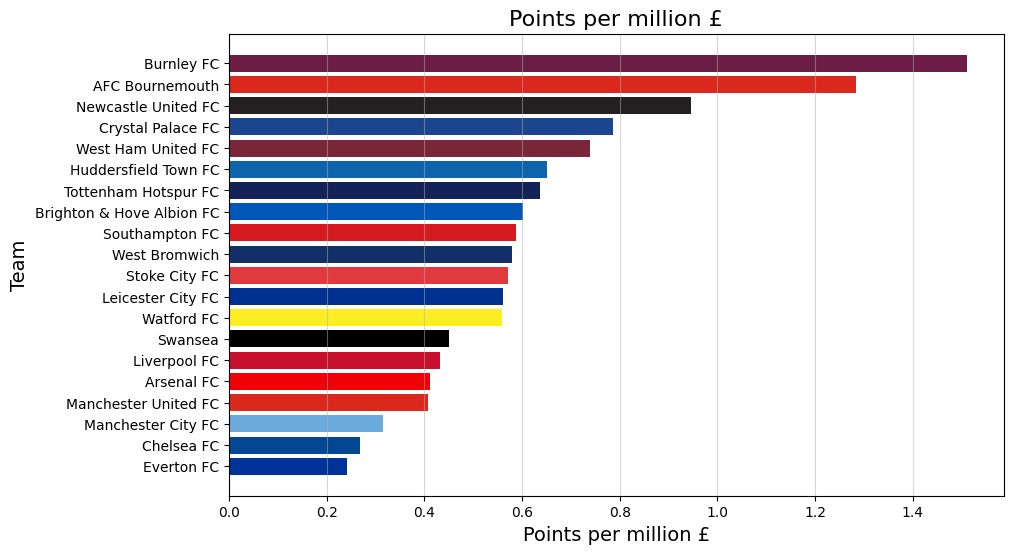

In [17]:
# As seen in the graph we can see that there is a positive correlation between expenditure and points
# However there are teams that spent a lot of money but didn't get a lot of points, like Everton
# And there are teams that didn't spend a lot of money but got a lot of points, like Burnley

# Lets look at how many points each team got for each million £ they spent
# And create a bar chart to see which team got the most points for each million £ they spent

financial['points per million £'] = financial['points'] / financial['expenditure']
financial = financial.sort_values(by=['points per million £'], ascending=True)

plt.figure(figsize=(10,6))
plt.barh(financial['team'], financial['points per million £'], color=[team_colors[i] for i in financial['team']])
plt.xlabel('Points per million £', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.title('Points per million £', fontsize=16)
plt.grid(axis='x', alpha=0.5)
plt.show()

/var/folders/lb/pwyb2dqx58gb1jd7f7zd3_rm0000gn/T/ipykernel_8251/638310845.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(financial['transfer record'], p(financial['transfer record']), "r--", color='black', linewidth=1.0, alpha=0.4)


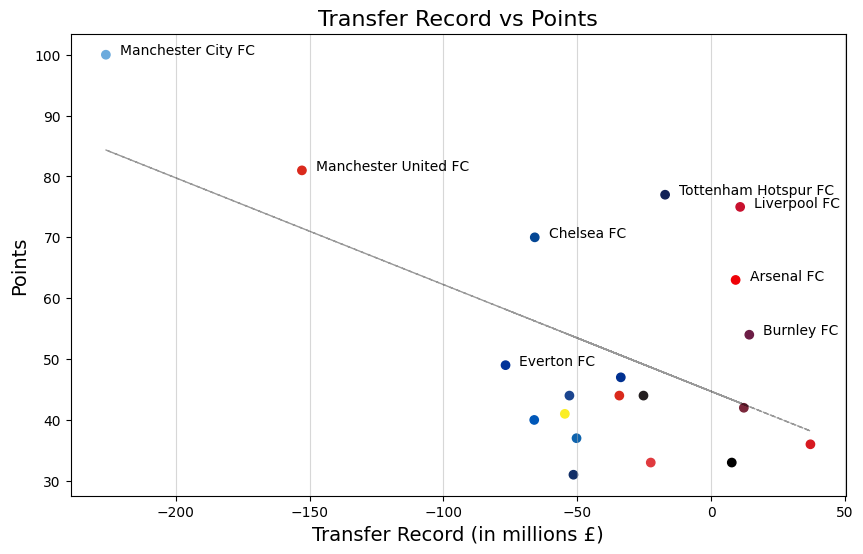

In [18]:
# This graph shows us that a team like Everton really did not spend their money well this season, in terms of points

# However, we still need to take into account for teams selling players, meaaning that we would need to look at the transfer record

# Lets plot the transfer record vs points
# We will also add a line of best fit to the data

plt.figure(figsize=(10,6))
plt.scatter(financial['transfer record'], financial['points'], color=[team_colors[i] for i in financial['team']])
# print out all the names of the scatters that are above the 100 million mark
for i, txt in enumerate(financial['team']):
    if financial['points'].iloc[i] > 48:
        plt.annotate(txt, 
                     (financial['transfer record'].iloc[i], financial['points'].iloc[i]), 
                     xytext=(10,0), 
                     textcoords='offset points')

# Fit a line to the data
z = np.polyfit(financial['transfer record'], financial['points'], 1)
p = np.poly1d(z)
plt.plot(financial['transfer record'], p(financial['transfer record']), "r--", color='black', linewidth=1.0, alpha=0.4)

plt.xlabel('Transfer Record (in millions £)', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.title('Transfer Record vs Points', fontsize=16)
plt.grid(axis='x', alpha=0.5)
plt.show()

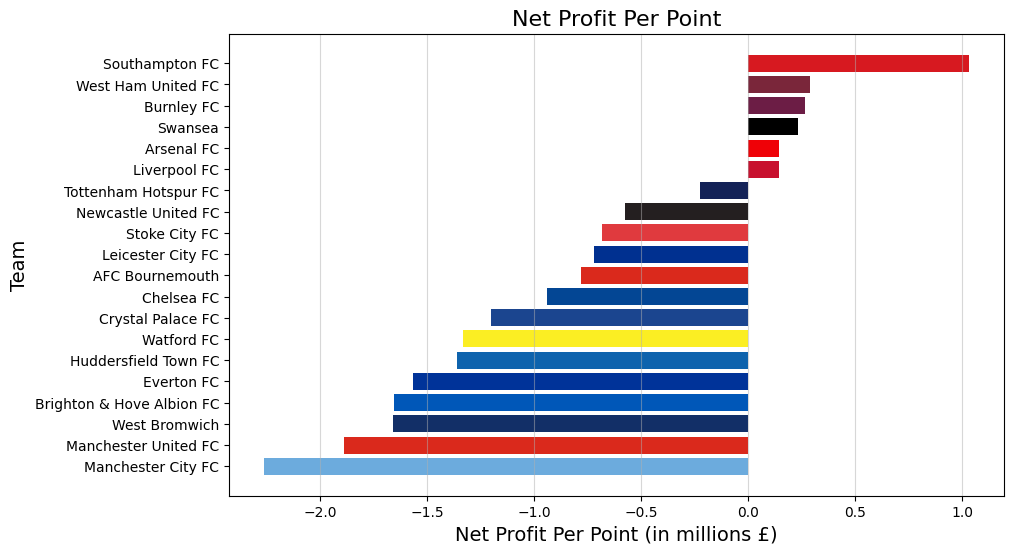

In [19]:
# All of the teams that are left from the 0 mark, are teams that earned more money on players than they spent on players
# Looking at the teams that did best from this, we can say that Liverpool managed to get the most points, while still going plus on the transfer market

# Lets now plot how many points each team got for each million £ they went plus/minus on the transfer market
financial['net profit per point'] = financial['transfer record'] / financial['points']
financial = financial.sort_values(by=['net profit per point'], ascending=True)

plt.figure(figsize=(10,6))
plt.barh(financial['team'], financial['net profit per point'], color=[team_colors[i] for i in financial['team']])
plt.xlabel('Net Profit Per Point (in millions £)', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.title('Net Profit Per Point', fontsize=16)
plt.grid(axis='x', alpha=0.5)
plt.show()

In [20]:
# Concluded from this graph we can see the teams that did best in terms of net profit per point
# Some of these teams payed a high price for each point that they got   
# While some of these teams got a lot of points, so maybe that investment was worth it, but some teams did not
# For example, Everton, Brighton, West Bromwich etc. payed a high price for each point they got, without getting a lot of points

## Conclusion

From all this data and graphs, we can conclude that there are teams that had a bigger chance of performing and placing themsleves higher up in the table. One of these teams is Everton.

With a spending that high and that little points, what did go wrong? Surely they could have invested their money better than they did. Let's look closer and analysing Everton.